# Performance Analysis with Topsis Method

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.DataFrame({'Companies':['AKSA','ALKIM','AYGAZ','BAGFS','BRISA','DEVA','GOODY','GUBRF','PETKM','SASA','SODA','TUPRS'],
                   'ROA':[4.77,14.95,9.64,-3.26,2.82,5.92,5.68,-1.29,11.67,13.27,17.38,5.8],
                   'Earnings per Share':[0.68,2.11,1.38,-0.83,0.26,0.3,0.17,-0.13,0.48,0.37,0.76,7.23],
                   'ROE':[10.06,23.63,15.18,-7.75,14.05,11.76,10.09,-4.64,24.37,25.95,22.18,22.41],
                   'Net Profit Margin':[6.43,17.41,6.16,-7.53,4.53,8.76,3.4,-1.55,16.14,11.58,29.08,5.2]})

In [3]:
df

,Companies,ROA,Earnings per Share,ROE,Net Profit Margin
0,AKSA,4.77,0.68,10.06,6.43
1,ALKIM,14.95,2.11,23.63,17.41
2,AYGAZ,9.64,1.38,15.18,6.16
3,BAGFS,-3.26,-0.83,-7.75,-7.53
4,BRISA,2.82,0.26,14.05,4.53
5,DEVA,5.92,0.30,11.76,8.76
6,GOODY,5.68,0.17,10.09,3.40
7,GUBRF,-1.29,-0.13,-4.64,-1.55
8,PETKM,11.67,0.48,24.37,16.14
9,SASA,13.27,0.37,25.95,11.58


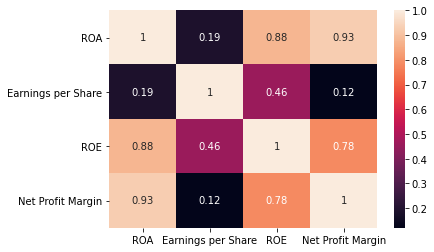

In [4]:
sns.heatmap(df.corr(), annot = True);

In [6]:
# Splitting into Numerical and Categorical variables
df1=df._get_numeric_data()
df2=df.drop(df._get_numeric_data(), axis=1)

In [7]:
df1

,ROA,Earnings per Share,ROE,Net Profit Margin
0,4.77,0.68,10.06,6.43
1,14.95,2.11,23.63,17.41
2,9.64,1.38,15.18,6.16
3,-3.26,-0.83,-7.75,-7.53
4,2.82,0.26,14.05,4.53
5,5.92,0.30,11.76,8.76
6,5.68,0.17,10.09,3.40
7,-1.29,-0.13,-4.64,-1.55
8,11.67,0.48,24.37,16.14
9,13.27,0.37,25.95,11.58


In [8]:
df2

,Companies
0,AKSA
1,ALKIM
2,AYGAZ
3,BAGFS
4,BRISA
5,DEVA
6,GOODY
7,GUBRF
8,PETKM
9,SASA


In [9]:
# Normalization
df_n = np.array(df1/np.sqrt((df1**2).sum()))
df_n

array([[ 0.14550231,  0.08711579,  0.166047  ,  0.15082088],
       [ 0.45602925,  0.27031518,  0.3900289 ,  0.40836571],
       [ 0.29405498,  0.17679381,  0.25055601,  0.14448781],
       [-0.09944183, -0.10633251, -0.12791891, -0.17662227],
       [ 0.08602023,  0.03330898,  0.23190461,  0.10625483],
       [ 0.18058148,  0.03843344,  0.19410664,  0.20547292],
       [ 0.17326061,  0.02177895,  0.16654217,  0.07974977],
       [-0.03934968, -0.01665449, -0.07658629, -0.03635651],
       [ 0.35597735,  0.0614935 ,  0.40224309,  0.37857683],
       [ 0.40478315,  0.04740124,  0.42832204,  0.27161832],
       [ 0.53015307,  0.09736471,  0.36609568,  0.68209505],
       [ 0.17692105,  0.92624584,  0.36989198,  0.12197023]])

In [10]:
# Multiply by the coefficient
df_k=df_n*(1/len(df1.columns))
df_k

array([[ 0.03637558,  0.02177895,  0.04151175,  0.03770522],
       [ 0.11400731,  0.06757879,  0.09750722,  0.10209143],
       [ 0.07351375,  0.04419845,  0.062639  ,  0.03612195],
       [-0.02486046, -0.02658313, -0.03197973, -0.04415557],
       [ 0.02150506,  0.00832724,  0.05797615,  0.02656371],
       [ 0.04514537,  0.00960836,  0.04852666,  0.05136823],
       [ 0.04331515,  0.00544474,  0.04163554,  0.01993744],
       [-0.00983742, -0.00416362, -0.01914657, -0.00908913],
       [ 0.08899434,  0.01537337,  0.10056077,  0.09464421],
       [ 0.10119579,  0.01185031,  0.10708051,  0.06790458],
       [ 0.13253827,  0.02434118,  0.09152392,  0.17052376],
       [ 0.04423026,  0.23156146,  0.092473  ,  0.03049256]])

In [11]:
# Ideal and Negative Ideal weight
ideal=df_k.max(axis=0)
neg_ideal=df_k.min(axis=0)
print(ideal)
print(neg_ideal)

[0.13253827 0.23156146 0.10708051 0.17052376]
[-0.02486046 -0.02658313 -0.03197973 -0.04415557]


In [13]:
ideal

array([0.13253827, 0.23156146, 0.10708051, 0.17052376])

In [14]:
# Distance to Ideal and Negative Ideal Values
Ideal_distance = []
Neg_distance = []
for i in range(len(df_k)):
    Ideal_distance.append(np.sqrt(((df_k-ideal)**2)[i].sum()))
    Neg_distance.append(np.sqrt(((df_k-neg_ideal)**2)[i].sum()))

In [15]:
# Finding scores
score = pd.DataFrame({'Ideal_distance':np.array(Ideal_distance),'Neg_distance':np.array(Neg_distance)})
score['topsis_scores']=score['Neg_distance']/(score['Neg_distance']+score['Ideal_distance'])

In [16]:
score = pd.concat([df2, score], axis=1)
print(score)

   Companies  Ideal_distance  Neg_distance  topsis_scores
0       AKSA        0.274219      0.134874       0.329690
1      ALKIM        0.178909      0.257499       0.590042
2      AYGAZ        0.242132      0.173449       0.417366
3      BAGFS        0.396028      0.000000       0.000000
4      BRISA        0.292058      0.128303       0.305222
5       DEVA        0.272997      0.147705       0.351092
6      GOODY        0.293341      0.123292       0.295924
7      GUBRF        0.352181      0.046072       0.115686
8      PETKM        0.233310      0.227059       0.493210
9       SASA        0.244512      0.221952       0.475818
10      SODA        0.207803      0.297839       0.589031
11     TUPRS        0.166194      0.304094       0.646612


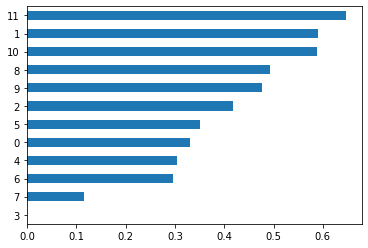

In [17]:
score.topsis_scores.sort_values( ascending=True).plot.barh();

## With Function

In [18]:
def data(dataset):
    # Normalization
    dataset1=dataset._get_numeric_data()
    dataset2=dataset.drop(dataset._get_numeric_data(), axis=1)
    df_n = np.array(dataset1/np.sqrt((dataset1**2).sum()))
    # Multiply by the coefficient
    df_k=df_n*(1/len(dataset1.columns))
    # Ideal and Negative Ideal weight
    ideal=df_k.max(axis=0)
    neg_ideal=df_k.min(axis=0)
    # Distance to Ideal and Negative Ideal Values
    Ideal_distance = []
    Neg_distance = []
    for i in range(len(df_k)):
        Ideal_distance.append(np.sqrt(((df_k-ideal)**2)[i].sum()))
        Neg_distance.append(np.sqrt(((df_k-neg_ideal)**2)[i].sum()))
    # Finding scores
    score = pd.DataFrame({'Ideal_distance':np.array(Ideal_distance),'Neg_distance':np.array(Neg_distance)})
    score['topsis_scores']=score['Neg_distance']/(score['Neg_distance']+score['Ideal_distance'])
    score = pd.concat([dataset2, score], axis=1)
    print(score)
    score.topsis_scores.sort_values( ascending=True).plot.barh();

   Companies  Ideal_distance  Neg_distance  topsis_scores
0       AKSA        0.274219      0.134874       0.329690
1      ALKIM        0.178909      0.257499       0.590042
2      AYGAZ        0.242132      0.173449       0.417366
3      BAGFS        0.396028      0.000000       0.000000
4      BRISA        0.292058      0.128303       0.305222
5       DEVA        0.272997      0.147705       0.351092
6      GOODY        0.293341      0.123292       0.295924
7      GUBRF        0.352181      0.046072       0.115686
8      PETKM        0.233310      0.227059       0.493210
9       SASA        0.244512      0.221952       0.475818
10      SODA        0.207803      0.297839       0.589031
11     TUPRS        0.166194      0.304094       0.646612


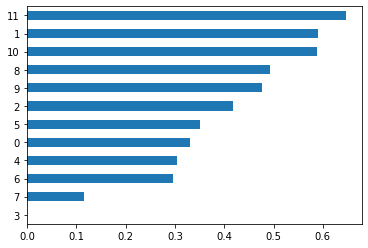

In [19]:
data(df)

In [21]:
# The TUPRS has the best topsis score.